## IMPORTING PACKAGES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt                     
import seaborn as sns                               
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression  
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split                   
from sklearn.metrics import classification_report     
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings                                                                                     
warnings.filterwarnings("ignore")

## READING DATASET

In [2]:
data = pd.read_csv('transaction.csv')
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [3]:
data.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


The target variable in our dataset is labeled 'class', which consists of binary values: 0 and 1. Here, '0' represents transactions that are non-fraudulent, while '1' indicates transactions that have been identified as fraudulent. This binary classification plays a crucial role in our analysis, providing a clear distinction between normal and suspicious transactional activities.

## EXPLORATORY DATA ANALYSIS

In [4]:
#eterming shape of our dataset
data.shape

(568630, 31)

The dataset conatins 568630 rows and 31 columns

In [5]:
data.size

17627530

The dataset is of size 17627530

In [6]:
#Displaying information of our dataset using .info() fuction
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [7]:
data.isna().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

The credit card 2023 dataset has zero null values

In [8]:
##Removing duplicates from our dataset

data.duplicated().any()

False

There are no duplicate varibles/values in the dataset.

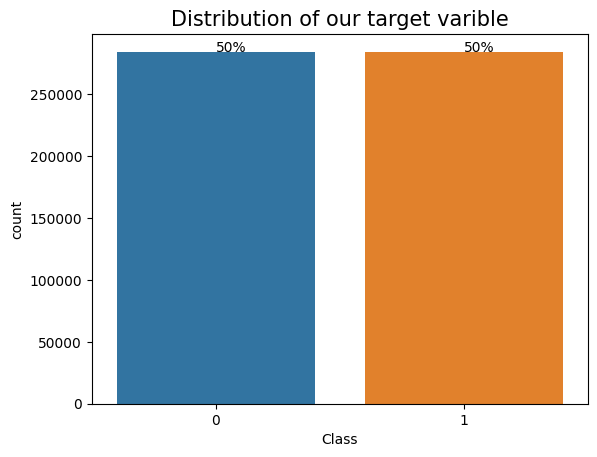

In [9]:
ax = sns.countplot(x = 'Class', data = data)
plt.title('Distribution of our target varible', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_height() / data.shape[0]) * 100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x() + p.get_width()/2
    y=p.get_height()+.05
    ax.annotate(percentage,(x,y))

In the banking sector, our findings indicate that there is an equal probability of both occurrence and non-occurrence of fraudulent activities. This situation underscores the necessity for vigilant monitoring of all transactions, encompassing both online purchases and cash withdrawals. Effective monitoring of credit cards can be achieved by analyzing historical transaction data associated with each card and examining the financial history of accounts linked to the credit cards. Such proactive measures are crucial for identifying and mitigating potential fraud risks.

<Axes: xlabel='Class', ylabel='Amount'>

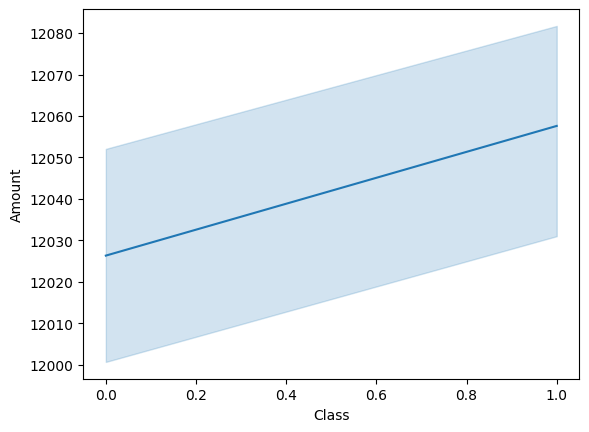

In [10]:
sns.lineplot(x = 'Class', y = 'Amount', data = data)

It's clear from the above line graph, increase in amount results to higher occurance of fraud activities.

<Axes: >

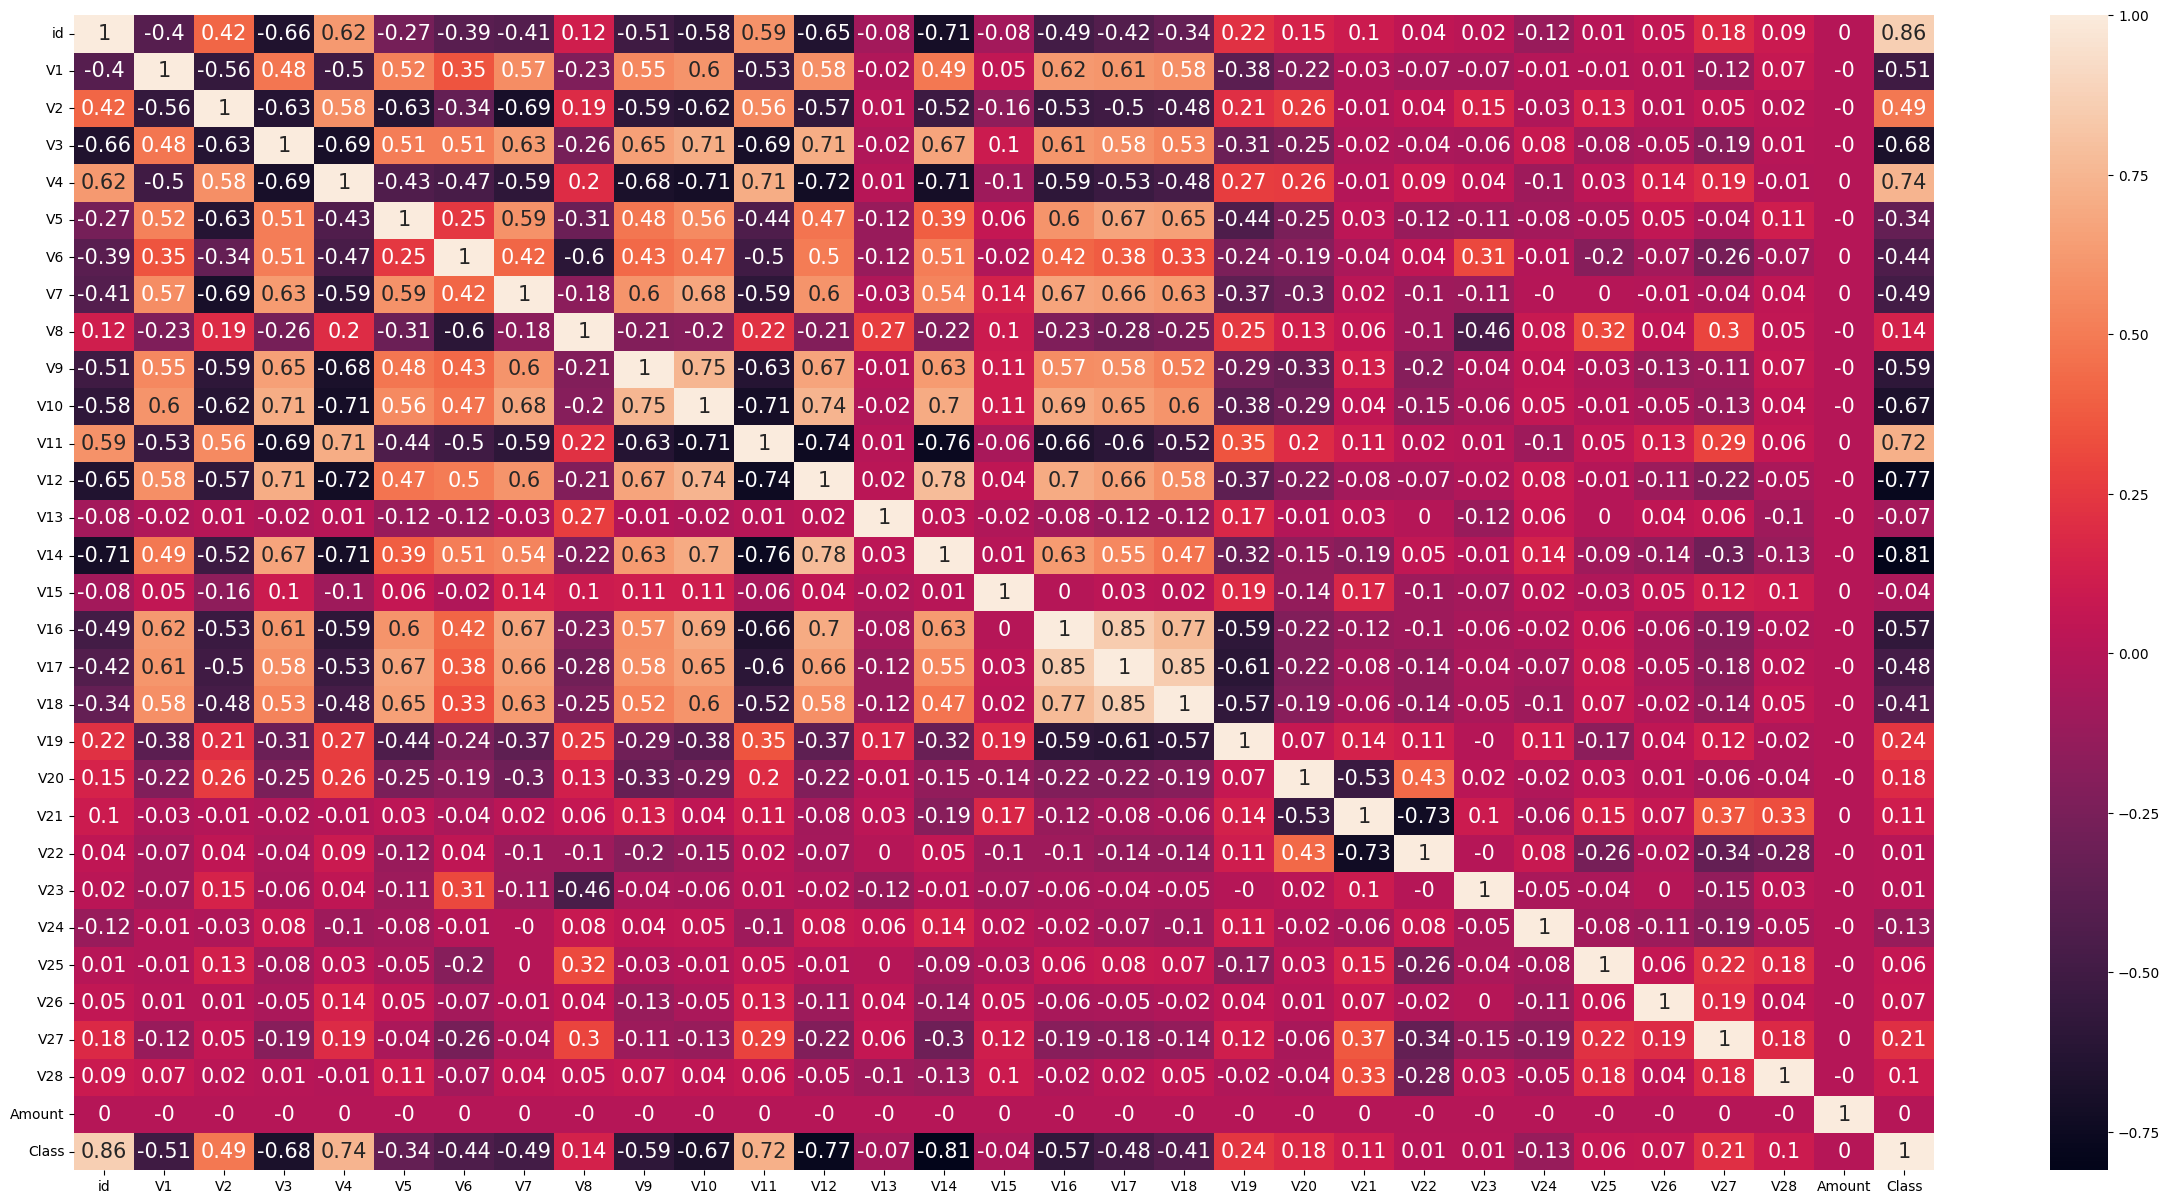

In [11]:
plt.figure(figsize = (30, 15))
sns.heatmap(data.corr().round(2), annot = True, annot_kws={'size': 15})

## Correlation analysis from the heatmap

V16 and V17 have a correlation of 0.85, thus implying they are highly correlated.

V17 and V18 have a correlation of 0.85,indicating a high correlation.

V11 and V14 have the highest negative correlation of -0.76


## Correlation between 0.74 to 0.84 inclued:

V9 and V10 are have a correlation of 0.75

V10 and V12 have a correlation of 0.74

V10 and V18 have a correlationof 0.77

V12 and V14 have a correlationof 0.78


## Correlation between -0.70 to -0.75 inclued:

V4 is negativley correlated with V10 and V12, the correlation is -0.71 and -0.72 respectively.

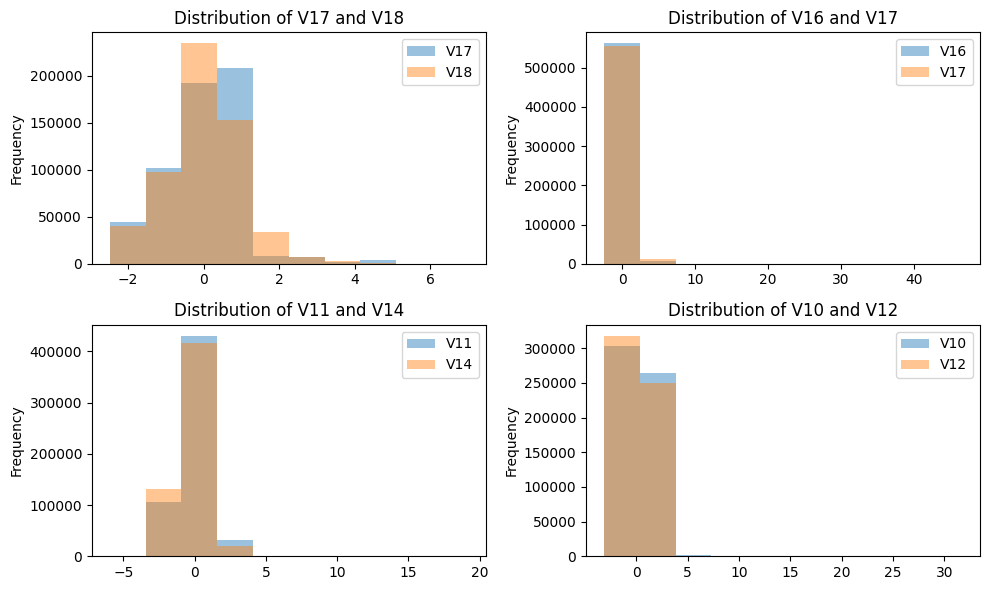

In [12]:
paper, axes = plt.subplots(2, 2, figsize=(10, 6))
V17_V18 = data[['V17', 'V18']]
V16_V17 = data[['V16', 'V17']]
V11_V14 = data[['V11', 'V14']]
V10_V12 = data[['V10', 'V12']]

V17_V18.plot(kind = 'hist', alpha = 0.45, title = 'Distribution of V17 and V18', ax=axes[0,0])
V16_V17.plot(kind = 'hist', alpha = 0.45, title = 'Distribution of V16 and V17', ax=axes[0,1])
V11_V14.plot(kind = 'hist', alpha = 0.45, title = 'Distribution of V11 and V14', ax=axes[1,0])
V10_V12.plot(kind = 'hist', alpha = 0.45, title = 'Distribution of V10 and V12', ax=axes[1,1])
plt.tight_layout()
plt.show()

In [13]:
#Checking the skewnwss of our varibles
data.skew()

id       -6.579536e-16
V1       -8.341717e-02
V2       -1.397952e+00
V3        1.462221e-02
V4       -4.416893e-02
V5        1.506414e+00
V6       -2.016110e-01
V7        1.902687e+01
V8        2.999722e-01
V9        1.710575e-01
V10       7.404136e-01
V11      -2.089056e-02
V12       6.675895e-02
V13       1.490639e-02
V14       2.078348e-01
V15       1.123298e-02
V16       2.664070e-01
V17       3.730610e-01
V18       1.291911e-01
V19      -1.017123e-02
V20      -1.556460e+00
V21      -1.089833e-01
V22       3.185295e-01
V23      -9.968746e-02
V24       6.608974e-02
V25       2.300804e-02
V26      -1.895874e-02
V27       2.755452e+00
V28       1.724978e+00
Amount    1.655585e-03
Class     0.000000e+00
dtype: float64

V1 and V23 have the highest negative skew

Text(0.5, 1.0, 'Distribution of all V varibles (V1-V28)')

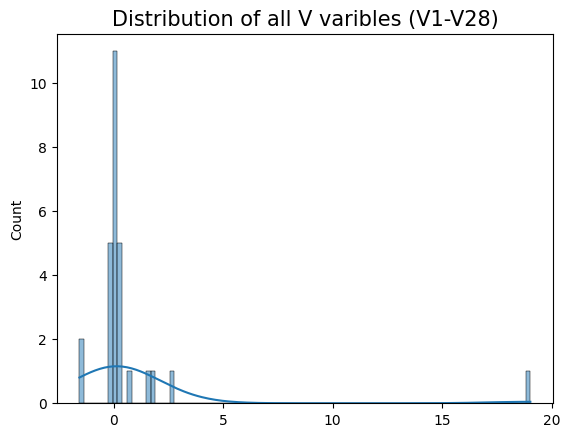

In [14]:
# Determing the Skew distribution of all V varibles
sns.histplot(x = data.drop(['id', 'Amount', 'Class'], axis = 1).skew(), kde = True)
plt.title('Distribution of all V varibles (V1-V28)', fontdict = {'size': 15})

Varibles V1 to v28 have a normaly distribution.

Distribution is skewed to the right

# Amount Analysis

<Axes: xlabel='Amount', ylabel='Count'>

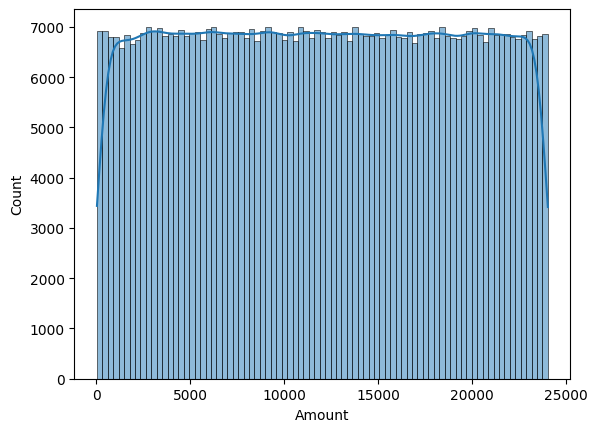

In [15]:
#Analysising Data Distribution 
sns.histplot(x = data.Amount, kde = True)

Amount is fairly normaly distributed across credit card dataset.

In [16]:
amount = pd.cut(data['Amount'], [0, 5000, 10000, 15000, 20000, 25000])
data.pivot_table('Class', [amount], aggfunc = sum)

,Class
Amount,
"(0, 5000]",58326
"(5000, 10000]",59321
"(10000, 15000]",59421
"(15000, 20000]",59508
"(20000, 25000]",47739


The amount is grouped into 5 categories, increase in amount results to high cases of credit card fraud for amount between 0 - 20000.

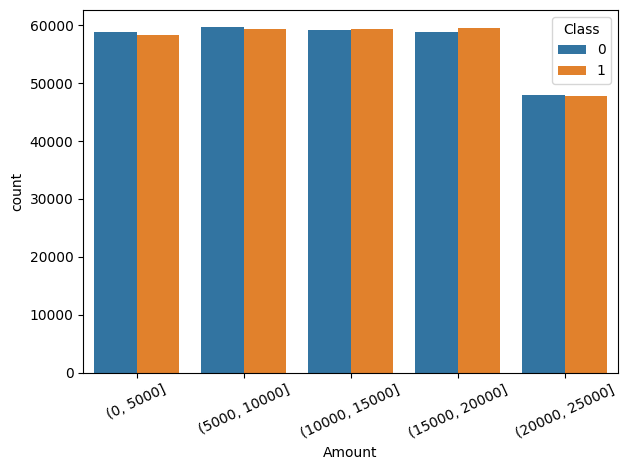

In [17]:
sns.countplot(data = data, x = amount, hue ='Class')
plt.xticks(rotation = 25)
plt.tight_layout()
plt.show()

There are more cases of fraud for two categories, (10000,15000) amount and (15000,20000) amount.

# DATA PREPARATION

In [18]:
#Subsetting dataset into dependent and independent varibles
x = data.drop(['id', 'Class'], axis = 1)
y = data.Class

In [19]:
#Displaying dimention of variables x and y
print(x.shape)
y.shape

(568630, 29)


(568630,)

In [20]:
scale= StandardScaler()

Scaled_X = scale.fit_transform(x)
x_scaled_df = pd.DataFrame(Scaled_X,columns=x.columns)
x_scaled_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0.858447
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,-0.796369
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,-1.377011
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,-0.962119
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0.323285


# MODELLING

In [21]:
#Split dataset into train and test
x_train,x_test,y_train,y_test = train_test_split(x_scaled_df,y,test_size=0.25,random_state=15,stratify= y)

We added the stratify parameter and set it to y, which is our label or target variable. This ensures that the distribution of labels will be the same in the training and test sets as they are in the original dataset.

In [22]:
#Lets see the shapes
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(426472, 29)
(142158, 29)
(426472,)
(142158,)


### Logistic Regression

In [23]:
#Building a Logistic Regression Model
Log_Reg=LogisticRegression()
Log_Reg.fit(x_train,y_train)

LogisticRegression()

In [24]:
#Creating a function for Checking Model Accuracy,Classification Report and Confusion Matrix
def model_evaluation(actual, predicted):
  ac_score = accuracy_score(actual, predicted)
  conf_matrix = confusion_matrix(actual, predicted)
  class_report = classification_report(actual, predicted)
  print('Model Accuracy is: ', round(ac_score, 2))
  print(conf_matrix)
  print(class_report)

In [25]:
Log_Reg_train = Log_Reg.predict(x_train)
Log_Reg_test = Log_Reg.predict(x_test)

In [26]:
print('Training Accuracy for Logistic Regression')
print('                                         ')
model_evaluation(y_train,Log_Reg_train)

Training Accuracy for Logistic Regression
                                         
Model Accuracy is:  0.97
[[208643   4593]
 [ 10330 202906]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97    213236
           1       0.98      0.95      0.96    213236

    accuracy                           0.97    426472
   macro avg       0.97      0.97      0.97    426472
weighted avg       0.97      0.97      0.97    426472


In [27]:
print('Testing Accuracy for Logistic Regression')
print('                                        ')
model_evaluation(y_test,Log_Reg_test)

Testing Accuracy for Logistic Regression
                                        
Model Accuracy is:  0.96
[[69545  1534]
 [ 3520 67559]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     71079
           1       0.98      0.95      0.96     71079

    accuracy                           0.96    142158
   macro avg       0.96      0.96      0.96    142158
weighted avg       0.96      0.96      0.96    142158


### Decision Tree

In [28]:
Dectree = DecisionTreeClassifier()
Dectree.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
Dectree_train=Dectree.predict(x_train)
Dectree_test=Dectree.predict(x_test)

In [30]:
print("Training Accuracy for Decision tree")
print('                                   ')
model_evaluation(y_train,Dectree_train)

Training Accuracy for Decision tree
                                   
Model Accuracy is:  1.0
[[213236      0]
 [     0 213236]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       1.00      1.00      1.00    213236

    accuracy                           1.00    426472
   macro avg       1.00      1.00      1.00    426472
weighted avg       1.00      1.00      1.00    426472


In [31]:
print("Testing Accuracy for Decision tree")
print('                                  ')
model_evaluation(y_test,Dectree_test)

Testing Accuracy for Decision tree
                                  
Model Accuracy is:  1.0
[[70851   228]
 [   85 70994]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       1.00      1.00      1.00     71079

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158


### Random Forest

In [32]:
RandForest = RandomForestClassifier()
RandForest.fit(x_train, y_train)

RandomForestClassifier()

In [33]:
RandForest_train = RandForest.predict(x_train)
RandForest_test = RandForest.predict(x_test)

In [34]:
print('Training Accuracy for Random Forest')
print('                                   ')
model_evaluation(y_train, RandForest_train)

Training Accuracy for Random Forest
                                   
Model Accuracy is:  1.0
[[213236      0]
 [     0 213236]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       1.00      1.00      1.00    213236

    accuracy                           1.00    426472
   macro avg       1.00      1.00      1.00    426472
weighted avg       1.00      1.00      1.00    426472


In [35]:
print('Testing Accuracy for Random Forest')
print('                                  ')
model_evaluation(y_test, RandForest_test)

Testing Accuracy for Random Forest
                                  
Model Accuracy is:  1.0
[[71059    20]
 [    0 71079]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       1.00      1.00      1.00     71079

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158


### Observation
I have built three machine learning models to be able to find the best model for detecting fraud activities;

1. Random forest gives 100% on both training and testing dataset

2. Logistic Regression gives 97% on the training dataset and 96% on the testing dataset

3. Decision Tree gives 100% on both training and testing dataset
    
The observation of equal accuracy levels in both the training and testing datasets for the Random Forest and Decision Tree models might suggest a potential overfitting issue. Consequently, we have identified Logistic Regression as the most effective model, evidenced by its impressive 96% accuracy on the testing dataset. Additionally, we conducted an Exploratory Data Analysis (EDA) on various features to gain deeper insights. This analysis allowed us to examine and compare the performance metrics - precision, recall, and f1-score - across each model, providing a comprehensive understanding of their effectiveness and reliability.

## CONCLUSION

The project revealed several pivotal insights: a significant correlation was observed between the transaction amount and the likelihood of fraud, with higher transaction values often indicating an increased risk of fraudulent activity. In contrast, lower transaction amounts were generally associated with a lower likelihood of fraud. This pattern suggests a nuanced relationship between transaction value and fraud risk within our dataset.
